In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklego.linear_model import LowessRegression
from sklearn import decomposition

In [42]:
data = pd.read_csv("../Dataset/Chen2019/data.csv")

In [43]:
table = data.iloc[:, 1:].transpose()
table.index = list(range(len(table)))
mirnas = data.iloc[:, 0]

In [44]:
table = table.drop([1, 4, 20])

In [45]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
0,306.514630,6504.479293,0.0,36055.276130,0.0,1273.827034,2814.361604,1228.048875,0.0,177.141572,...,332.389242,1.990355,25.874612,0.0,67.672061,0.0,340.350661,28802.423460,77.623835,1570.389891
2,142.481447,9437.584674,0.0,22678.699510,0.0,1381.345556,1388.590375,912.847238,0.0,84.522892,...,251.153738,2.414940,16.904578,0.0,21.734458,0.0,106.257351,46127.764800,7.244819,1714.607246
3,196.808885,1307.373304,0.0,11133.759750,0.0,267.097772,98.404442,238.982217,0.0,14.057777,...,323.328882,14.057777,0.000000,0.0,70.288887,0.0,112.462220,4470.373234,14.057777,140.577775
5,0.000000,3172.157520,0.0,15241.461610,0.0,619.325992,1253.757496,226.582680,0.0,30.211024,...,15.105512,15.105512,0.000000,0.0,0.000000,0.0,0.000000,12688.630080,75.527560,1676.711832
6,9.848239,1624.959376,0.0,6568.775175,0.0,502.260171,1940.103013,68.937670,0.0,19.696477,...,167.420057,9.848239,0.000000,0.0,0.000000,0.0,226.509489,17086.694040,0.000000,669.680228


In [46]:
sick = np.array(["cancer" in k for k in data.columns[1:]])
sick = np.delete(sick, [1, 4, 20])
controls = 1 - sick

In [47]:
sick

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [48]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [49]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

In [50]:
def mean_std_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, np.sqrt(variances))
    plt.xlabel("mean")
    plt.ylabel("std dev")
    plt.plot()

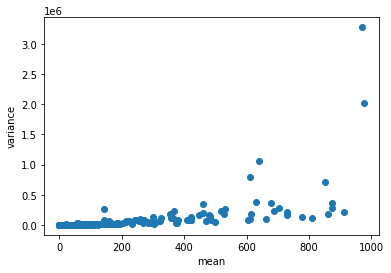

In [51]:
mean_variance_plot(table.loc[:, np.mean(table) < 1000])

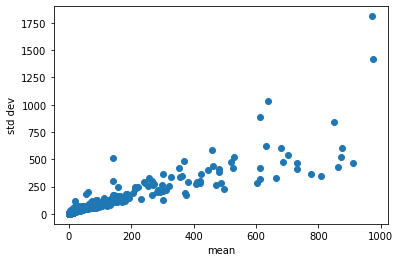

In [52]:
mean_std_plot(table.loc[:, np.mean(table) < 1000])

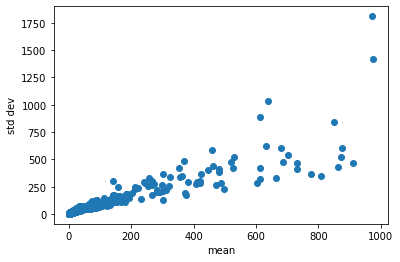

In [53]:
mean_std_plot(table.loc[:, np.logical_and(np.mean(table) < 1000, 3 * np.mean(table) > np.std(table))])

### Log transformation

In [54]:
log_table = table #np.log2(table + 1)

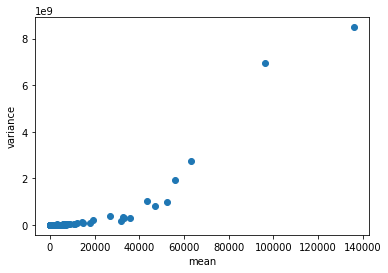

In [55]:
mean_variance_plot(log_table)

### Loess regression

In [56]:
lowess = LowessRegression(sigma=1, span=0.1)

In [57]:
means, variances = get_means_and_variances(log_table)
lowess.fit(means.to_numpy().reshape(-1,1), variances)

LowessRegression(span=0.1)

In [58]:
x_axis = np.linspace(-2, 14, 100)
y_axis = lowess.predict(x_axis.reshape(-1,1))

[]

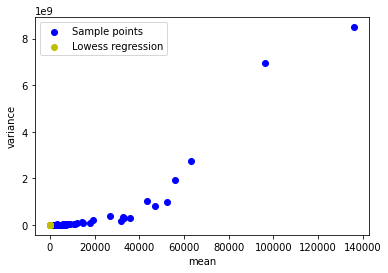

In [59]:
plt.scatter(means, variances, color="b")
plt.scatter(x_axis, y_axis, color="y")
plt.xlabel("mean")
plt.ylabel("variance")
plt.legend(["Sample points", "Lowess regression"])
plt.plot()

In [60]:
norm_log_table = log_table# - np.mean(log_table)

In [61]:
#norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

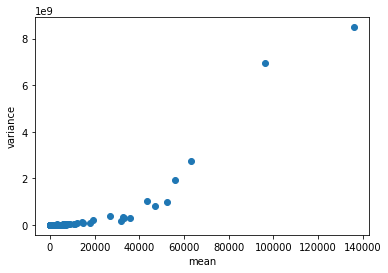

In [62]:
mean_variance_plot(norm_log_table)

# PCA

In [63]:
pca = decomposition.PCA(n_components=2)

In [64]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [65]:
components = pca.transform(norm_log_table)

In [66]:
components

array([[  14767.6136783 ,  -21655.43765043],
       [  92085.14165186,   45879.20051657],
       [ 238783.87849602, -176535.06768653],
       [ 188269.75120971,  -12488.41421397],
       [ 226880.83583917, -150383.88676859],
       [ 269126.88917155, -203593.66982024],
       [ 150948.89916216,  -36891.55543304],
       [  16863.76269478,   67247.48957548],
       [  46269.7330779 ,   17926.67734418],
       [  33527.5430246 ,   80867.23146488],
       [  -3227.52440068,  -55806.29107619],
       [  77964.6475047 ,   24095.27318383],
       [ 114932.97302721,  -76794.53007252],
       [ 138533.00518262,   61276.88836357],
       [ 165526.04699054,  -55413.66166772],
       [  78942.22587498,  -23260.94071894],
       [ -53301.41190826,   -3074.25267096],
       [-113279.93589716,  -28854.77655099],
       [ -23302.2431903 ,   14326.57440527],
       [-170447.05213498,  -63851.15717892],
       [-164340.54233305,  -57231.8331466 ],
       [  21322.89733104,   31732.2913553 ],
       [  

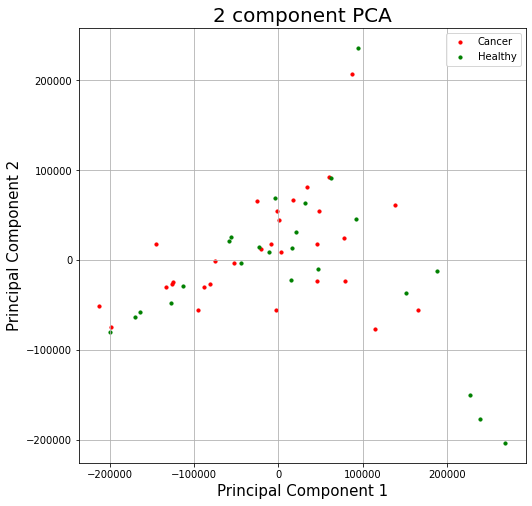

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [68]:
np.nonzero(components[:, 0] > 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 21, 22,
        24, 30, 36, 41, 42, 44, 45, 49, 50, 51], dtype=int64),)

### Export dataset

In [69]:
from Scripts import converters

In [70]:
mirnas[0]

'hsa-let-7a-3p'

In [71]:
sequences = converters.canonical_to_seq(mirnas)

In [72]:
sequences[:10]

['CUAUACAAUCUACUGUCUUUC',
 'UGAGGUAGUAGGUUGUAUAGUU',
 'CUAUACAACCUACUGCCUUCCC',
 'UGAGGUAGUAGGUUGUGUGGUU',
 'CUGUACAACCUUCUAGCUUUCC',
 'UGAGGUAGUAGGUUGUAUGGUU',
 'CUAUACGACCUGCUGCCUUUCU',
 'AGAGGUAGUAGGUUGCAUAGUU',
 'CUAUACGGCCUCCUAGCUUUCC',
 'UGAGGUAGGAGGUUGUAUAGUU']

In [73]:
sequences = np.array(sequences)
mirnas[sequences == "ACAGUAGUCUGCACAUUGGUUA"]

254    hsa-miR-199a-3p
256    hsa-miR-199b-3p
Name: miRNA, dtype: object

In [74]:
np.nonzero([sequences == "ACAGUAGUCUGCACAUUGGUUA"])

(array([0, 0], dtype=int64), array([254, 256], dtype=int64))

In [75]:
sequences = np.delete(sequences, [71])
norm_log_table = norm_log_table.drop(norm_log_table.columns[71], 1)

C:\Users\olefr\AppData\Local\Temp/ipykernel_13220/890718696.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  norm_log_table = norm_log_table.drop(norm_log_table.columns[71], 1)


In [76]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = sick
norm_log_table.head()

,CUAUACAAUCUACUGUCUUUC,UGAGGUAGUAGGUUGUAUAGUU,CUAUACAACCUACUGCCUUCCC,UGAGGUAGUAGGUUGUGUGGUU,CUGUACAACCUUCUAGCUUUCC,UGAGGUAGUAGGUUGUAUGGUU,CUAUACGACCUGCUGCCUUUCU,AGAGGUAGUAGGUUGCAUAGUU,CUAUACGGCCUCCUAGCUUUCC,UGAGGUAGGAGGUUGUAUAGUU,...,AAAUUAUUGUACAUCGGAUGAG,UUCAACGGGUAUUUAUUGAGCA,UCAAUAAAUGUCUGUUGAAUU,UUUGGCACUAGCACAUUUUUGCU,CUAUACAACUUACUACUUUCCC,UGAGGUAGUAAGUUGUAUUGUU,AACCCGUAGAUCCGAUCUUGUG,CAAGCUCGUGUCUGUGGGUCCG,CACCCGUAGAACCGACCUUGCG,cancer
0,306.514630,6504.479293,0.0,36055.276130,0.0,1273.827034,2814.361604,1228.048875,0.0,177.141572,...,1.990355,25.874612,0.0,67.672061,0.0,340.350661,28802.423460,77.623835,1570.389891,False
2,142.481447,9437.584674,0.0,22678.699510,0.0,1381.345556,1388.590375,912.847238,0.0,84.522892,...,2.414940,16.904578,0.0,21.734458,0.0,106.257351,46127.764800,7.244819,1714.607246,False
3,196.808885,1307.373304,0.0,11133.759750,0.0,267.097772,98.404442,238.982217,0.0,14.057777,...,14.057777,0.000000,0.0,70.288887,0.0,112.462220,4470.373234,14.057777,140.577775,False
5,0.000000,3172.157520,0.0,15241.461610,0.0,619.325992,1253.757496,226.582680,0.0,30.211024,...,15.105512,0.000000,0.0,0.000000,0.0,0.000000,12688.630080,75.527560,1676.711832,False
6,9.848239,1624.959376,0.0,6568.775175,0.0,502.260171,1940.103013,68.937670,0.0,19.696477,...,9.848239,0.000000,0.0,0.000000,0.0,226.509489,17086.694040,0.000000,669.680228,False


In [77]:
norm_log_table.to_csv("../TransformedData/Chen2019_raw.csv", index=False)